# EDA Social Distancing

## Importing relevant libraries

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # To display all columns

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import datetime

import warnings
warnings.filterwarnings(action='ignore')

import functions
import get_group

## Importing relevant data

In [2]:
US_county = pd.read_csv('data/CMU_US_data/overall-county-smoothed.csv')
US_state = pd.read_csv('data/CMU_US_data/overall-state-smoothed.csv')

In [3]:
dfs_country = functions.get_data("data/CMU_Global_data/Full_Survey_Data/country/smooth/", "country")
dfs_region = functions.get_data("data/CMU_Global_data/Full_Survey_Data/region/smooth/", "region")

Read in data completed.
Read in data completed.


In [4]:
countries = pd.concat(dfs_country)
regions = pd.concat(dfs_region)

In [5]:
countries = functions.insert_month(countries)
regions = functions.insert_month(regions)
US_state = functions.insert_month(US_state)
US_county = functions.insert_month(US_county)

Created month column.
Created month column.
Created month column.
Created month column.


## Palettes

In [6]:
gender_palette_global = ["steelblue", "g", "darkorange"]
gender_palette_usa = ["darkorange", "steelblue", "g"]

#### We are only going to keep the columns that are relevant for us

# ***Global Data***

#### Global dataset
The following columns are relevant as they are social distancing measures:
```bash
smoothed_pct_worked_outside_home_weighted 
smoothed_pct_grocery_outside_home_weighted  
smoothed_pct_ate_outside_home_weighted  
smoothed_pct_spent_time_with_non_hh_weighted
smoothed_pct_attended_public_event_weighted  
smoothed_pct_used_public_transit_weighted  
smoothed_pct_direct_contact_with_non_hh_weighted  
smoothed_pct_no_public_weighted  
```

The following columns are relevant as they are symptoms:
```bash
smoothed_pct_cli_weighted
smoothed_pct_ili_weighted
smoothed_pct_fever_weighted
smoothed_pct_cough_weighted
smoothed_pct_difficulty_breathing_weighted
smoothed_pct_fatigue_weighted
smoothed_pct_stuffy_runny_nose_weighted
smoothed_pct_aches_muscle_pain_weighted
smoothed_pct_sore_throat_weighted 
smoothed_pct_chest_pain_weighted
smoothed_pct_nausea_weighted 
smoothed_pct_anosmia_ageusia_weighted
smoothed_pct_eye_pain_weighted
smoothed_pct_headache_weighted
smoothed_pct_chills_weighted
smoothed_pct_cmnty_sick_weighted
```

## Gender

Disgarding rows where gender is "other":

In [7]:
regions_no_other = regions[regions["gender"] != "other"]

<AxesSubplot:xlabel='gender', ylabel='smoothed_pct_no_public_weighted'>

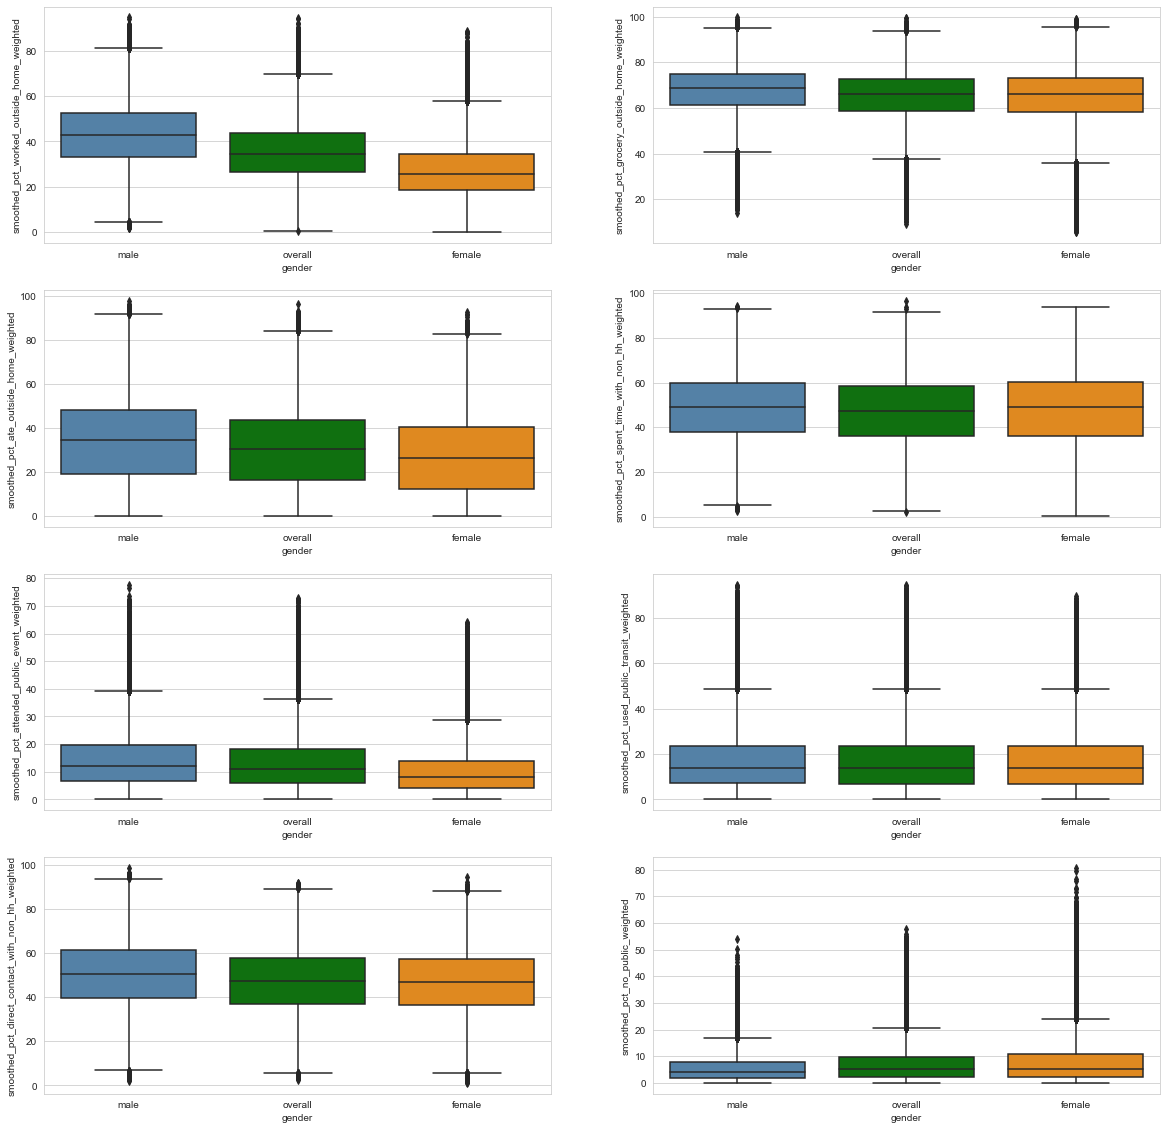

In [8]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.set_palette(gender_palette_global)
sns.boxplot(data=regions_no_other, x="gender", y="smoothed_pct_worked_outside_home_weighted", ax=axes[0][0])
sns.boxplot(data=regions_no_other, x="gender", y="smoothed_pct_grocery_outside_home_weighted", ax=axes[0][1])
sns.boxplot(data=regions_no_other, x="gender", y="smoothed_pct_ate_outside_home_weighted",  ax=axes[1][0])
sns.boxplot(data=regions_no_other, x="gender", y="smoothed_pct_spent_time_with_non_hh_weighted", ax=axes[1][1])
sns.boxplot(data=regions_no_other, x="gender", y="smoothed_pct_attended_public_event_weighted", ax=axes[2][0])
sns.boxplot(data=regions_no_other, x="gender", y="smoothed_pct_used_public_transit_weighted",  ax=axes[2][1])
sns.boxplot(data=regions_no_other, x="gender", y="smoothed_pct_direct_contact_with_non_hh_weighted", ax=axes[3][0])
sns.boxplot(data=regions_no_other, x="gender", y="smoothed_pct_no_public_weighted", ax=axes[3][1])

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_cli_weighted'>

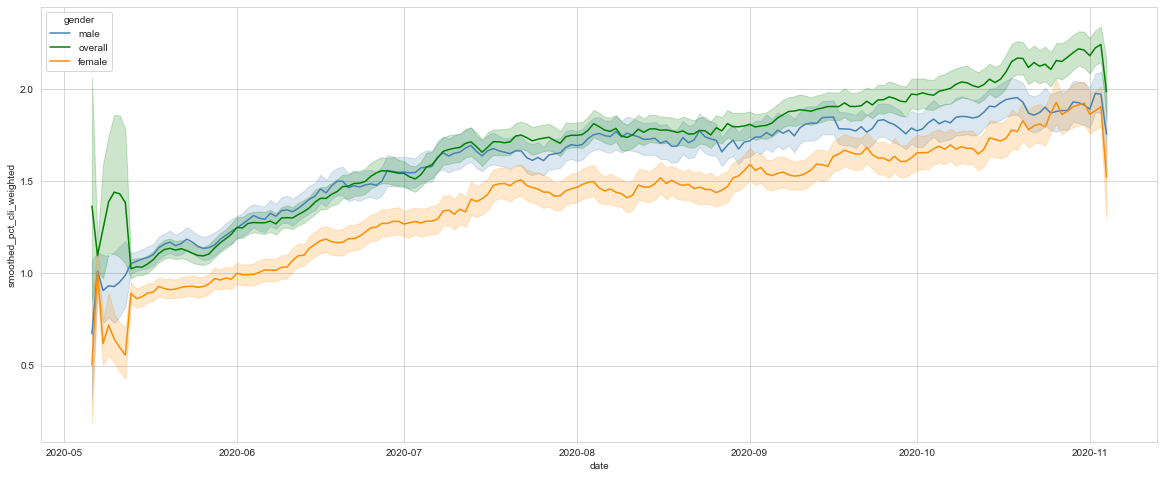

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_cli_weighted", hue="gender", palette=gender_palette_global)

In [11]:
regions_no_other[regions_no_other["gender"]=="male"].gender.count()

470974

In [12]:
regions_no_other[regions_no_other["gender"]=="female"].gender.count()

430876

In [13]:
regions_no_other[regions_no_other["gender"]=="overall"].gender.count()

660896

A higher percentage in men indicated covid like illness at any given time between May and November.

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_no_public_weighted'>

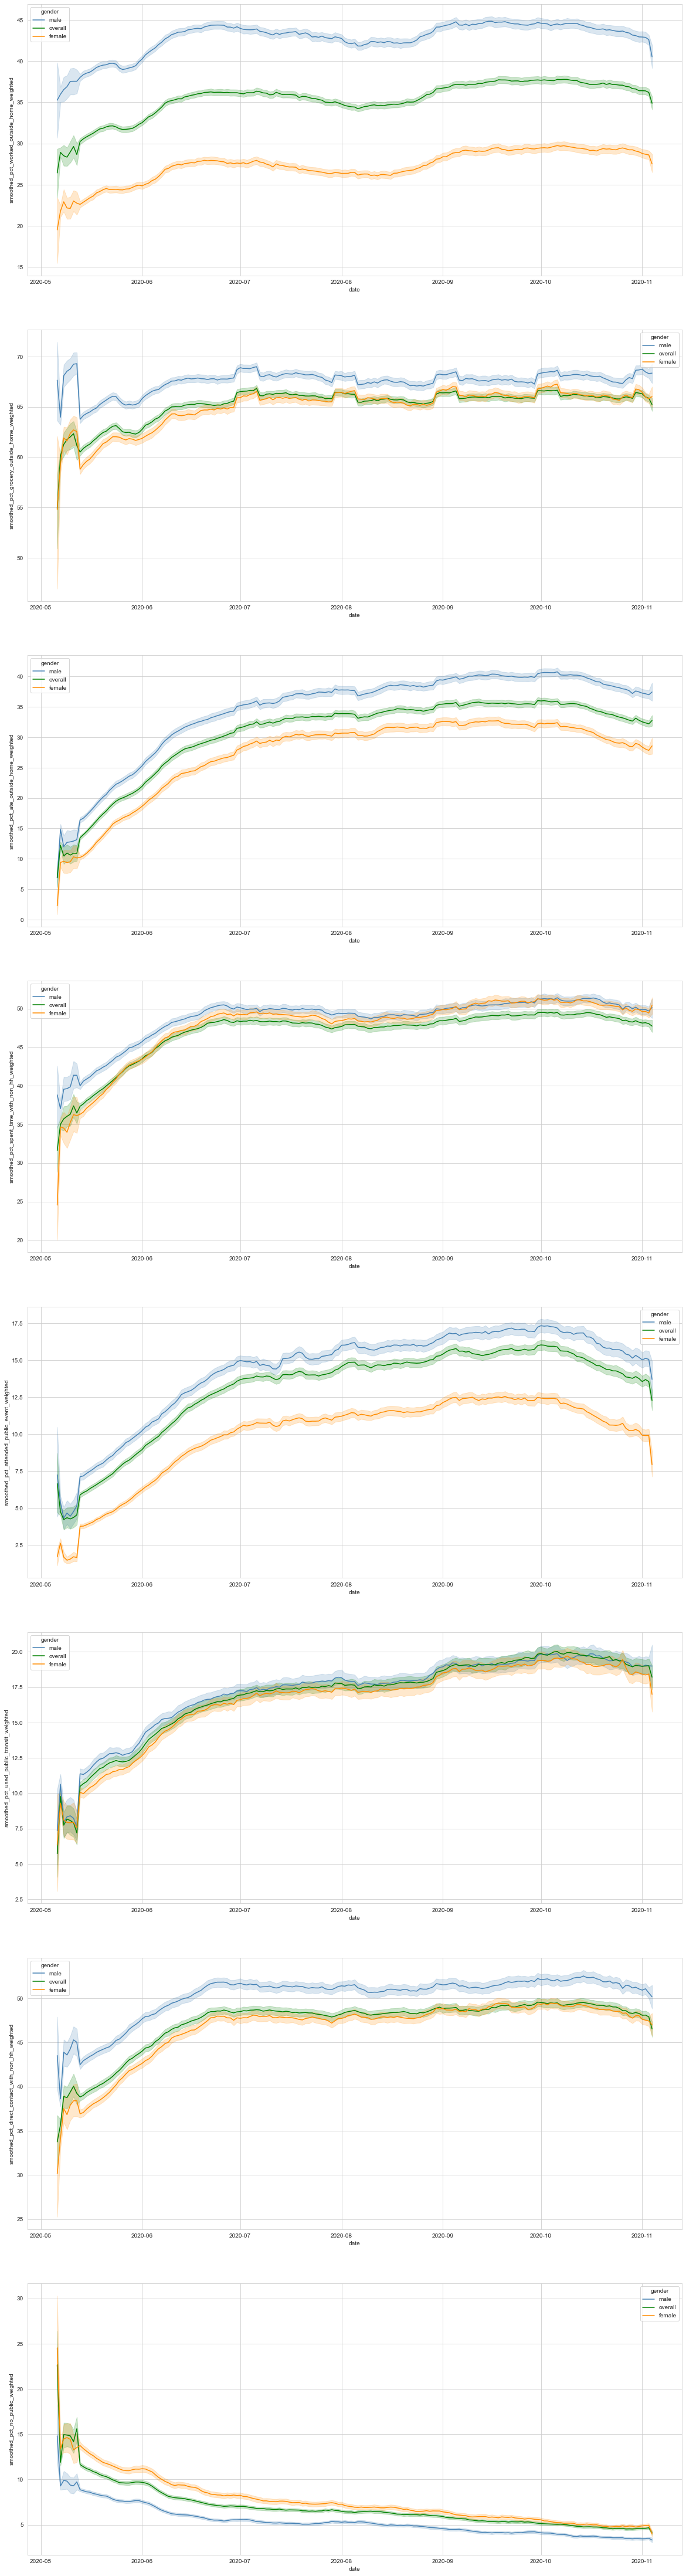

In [14]:
f, axes = plt.subplots(8,1, figsize=(20,80))
sns.set_palette(gender_palette_global)
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="gender", ax=axes[0])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="gender", ax=axes[1])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="gender", ax=axes[2])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="gender", ax=axes[3])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_attended_public_event_weighted", hue="gender", ax=axes[4])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_used_public_transit_weighted", hue="gender", ax=axes[5])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="gender", ax=axes[6])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_no_public_weighted", hue="gender", ax=axes[7])

It can be seen by both the box plots and the time series plots that women are more socially distanced than men. More men (in the last 24hr):
* worked more from outside of their home
* went grocery shopping or to a pharmacy
* went to a restaurant, cafe or shopping centre
* spend time with someone from a different household
* attended a public event with more than 10 people
* had direct contact (spending longer than 1 minute within 2 meters, or shaking hands, hugging, or kissing) with someone from a different household  

More men had also used public transport in the last 24 hours than women, however the difference is a lot smaller than for the other indicators of social distancing.   
When looking at the percentage of individuals who reported that they have not gone in public in the last 7 days,the percentage of women is higher, which is in line with what is described above.  
There are a number of different reasons, why this could be the case. One of these is the effect of gender roles. In many regions of the world, it is still the norm for the men to go out and work, while the women looks after the household and the family. This could definitely explain the big difference in percentage of men and women leaving the house.   
***Find a good way of saying women basically dont leave the house***

Furthermore, the time series plots show us how social distancing has changed over time. Less individuals went out in public, went to work, saw people from other households etc. in May than they did in November. This can be explained by government regulations that were in place. Most countries experienced the first wave of COVID-19 around Spring this year. This resulted in many countries to go into lockdown and introducing measurers such as closing restaurants and other public places, therefore less people attended them. After the number of cases decreased again countries started openeing up and people resumed to a more normal way of life. 

## Age

In [22]:
age_order = ["18-34", "35-54", "55+", "overall"]

<AxesSubplot:xlabel='age_bucket', ylabel='smoothed_pct_no_public_weighted'>

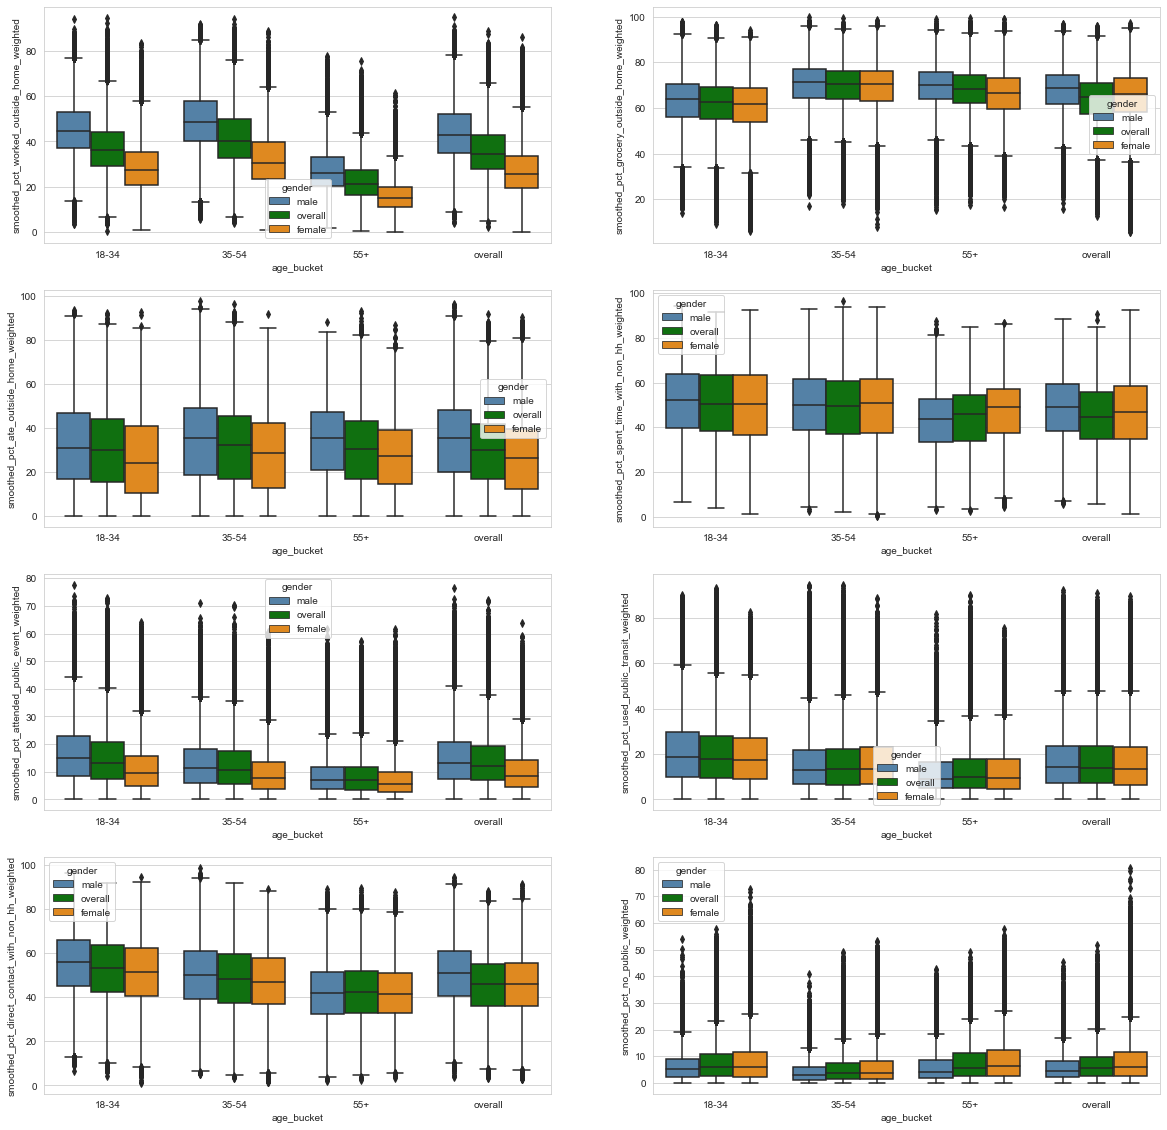

In [16]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.set_palette(gender_palette_global)

sns.boxplot(data=regions_no_other, x="age_bucket", y="smoothed_pct_worked_outside_home_weighted", hue="gender", order=age_order, ax=axes[0][0])
sns.boxplot(data=regions_no_other, x="age_bucket", y="smoothed_pct_grocery_outside_home_weighted",hue="gender", order=age_order, ax=axes[0][1])
sns.boxplot(data=regions_no_other, x="age_bucket", y="smoothed_pct_ate_outside_home_weighted",hue="gender", order=age_order, ax=axes[1][0])
sns.boxplot(data=regions_no_other, x="age_bucket", y="smoothed_pct_spent_time_with_non_hh_weighted",hue="gender", order=age_order, ax=axes[1][1])
sns.boxplot(data=regions_no_other, x="age_bucket", y="smoothed_pct_attended_public_event_weighted",hue="gender", order=age_order, ax=axes[2][0])
sns.boxplot(data=regions_no_other, x="age_bucket", y="smoothed_pct_used_public_transit_weighted", hue="gender", order=age_order, ax=axes[2][1])
sns.boxplot(data=regions_no_other, x="age_bucket", y="smoothed_pct_direct_contact_with_non_hh_weighted",hue="gender", order=age_order, ax=axes[3][0])
sns.boxplot(data=regions_no_other, x="age_bucket", y="smoothed_pct_no_public_weighted",hue="gender", order=age_order, ax=axes[3][1])

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_cli_weighted'>

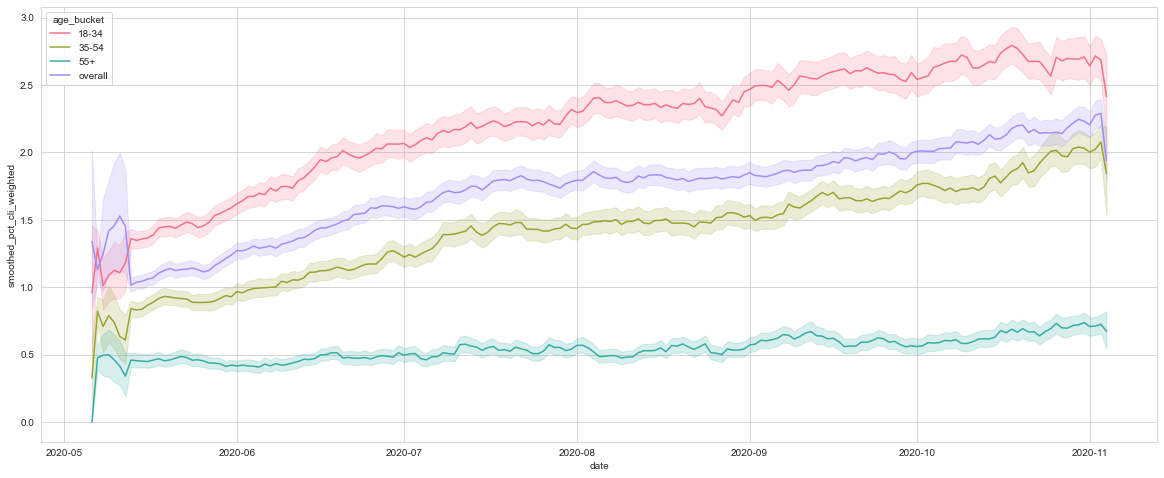

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_cli_weighted", hue="age_bucket", hue_order=age_order)

In [18]:
regions_no_other[regions_no_other["age_bucket"]=="18-34"].gender.count()

370282

In [23]:
regions_no_other[regions_no_other["age_bucket"]=="35-54"].gender.count()

372816

In [24]:
regions_no_other[regions_no_other["age_bucket"]=="55+"].gender.count()

225271

In [25]:
regions_no_other[regions_no_other["age_bucket"]=="overall"].gender.count()

594377

This graph shows that the younger the individuals the higher the percentage with COVID-like illness. The 18-34 age group, was the only age group where the percentage of individuals with COVID-like illness was above the average. 

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_no_public_weighted'>

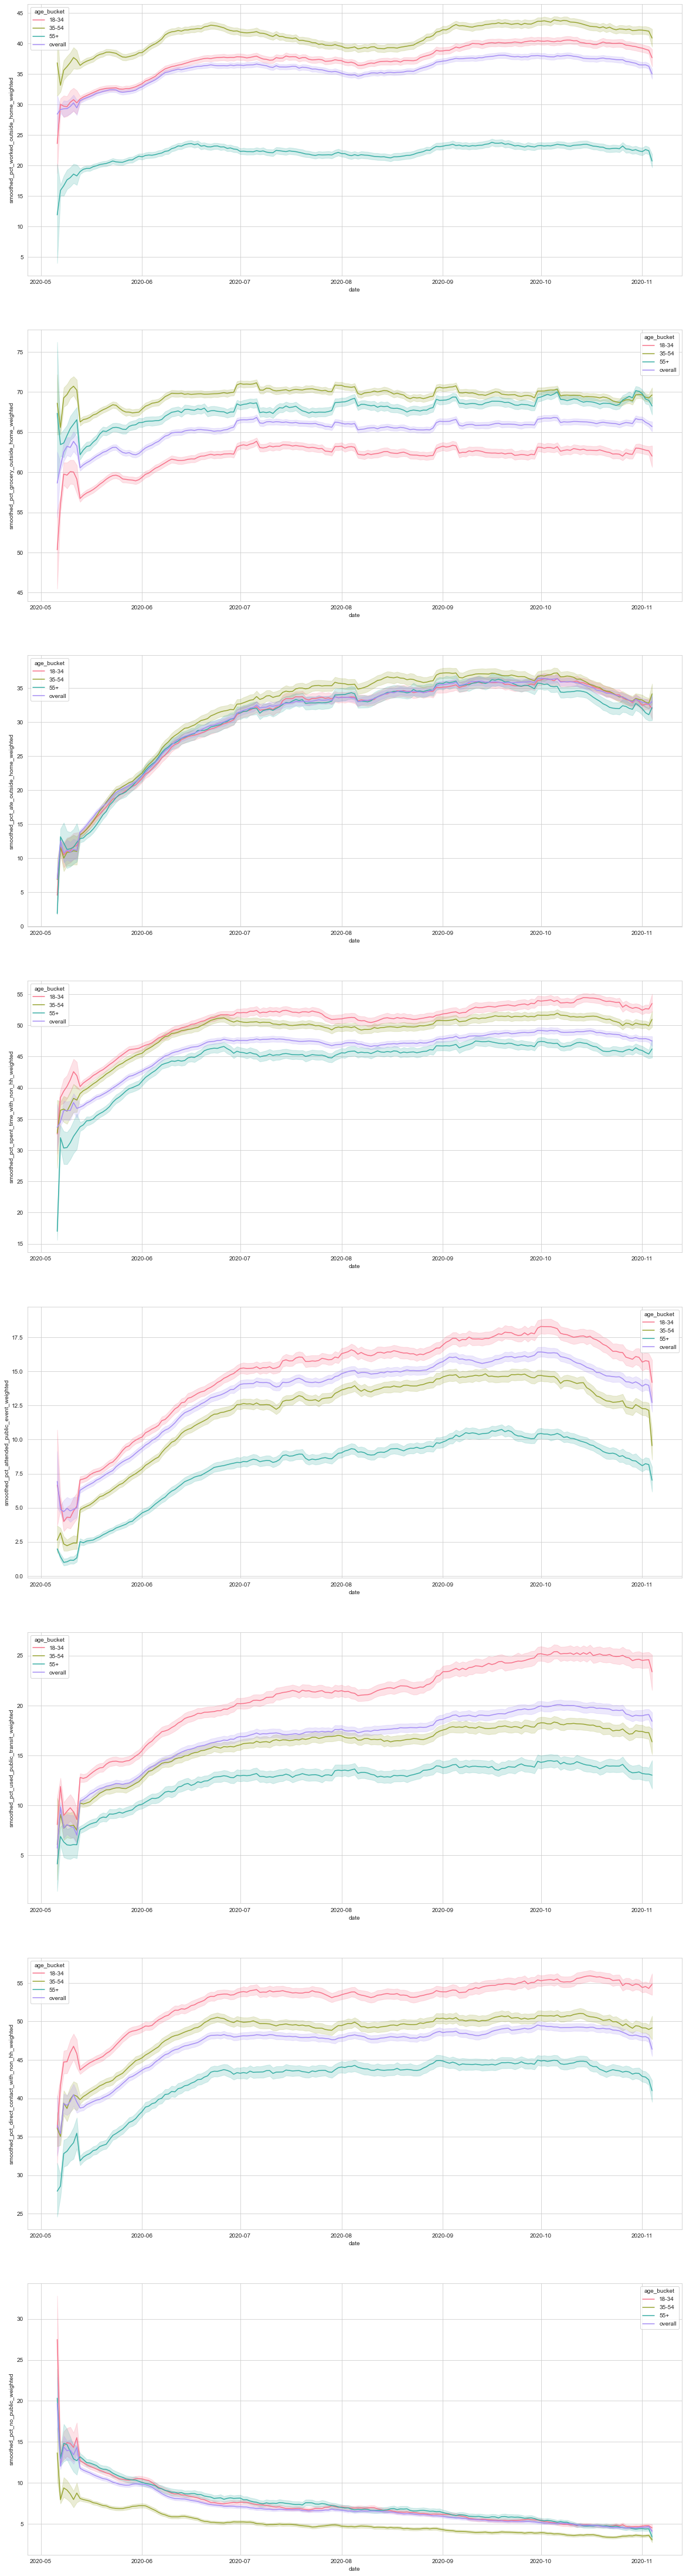

In [27]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[0])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[1])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[2])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[3])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_attended_public_event_weighted", hue="age_bucket", hue_order=age_order, ax=axes[4])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_used_public_transit_weighted", hue="age_bucket", hue_order=age_order, ax=axes[5])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[6])
sns.lineplot(data=regions_no_other, x="date", y="smoothed_pct_no_public_weighted", hue="age_bucket", hue_order=age_order, ax=axes[7])

The plots above show the general trend that older people socially distanced more than younger individuals.  
Other than leaving the house for grocery shopping or going to the pharmacy, young individuals (18-34) left their house more and were less socially distanced, while the oldest age-bucket (55+) indicated the most socially distanced behaviours, other than grocery shopping and going to the pharmacy.   
An explanation for fewer 18-34 year olds leaving to go the grocery market, could be that a significant number of them still live with their parents, and therefore one of them leaves the house to buy food. On top of that young people tend to me more likely to order their groceries online than older individuals.   
A big difference can be seen in the percentage of people who leave the house for work. The percentage of people above the age of 55+ is a lot lower, which is most likely due a lot of individuals in that age-bucket are retired.    
The reason for 55+ individuals being most socially distanced in general, and also having the highest percentage of people who have not gone in public in the last 7 days being the highest, could be explained by them belong to the high-risk group of people and therefore they are trying to protect themselves from getting infected.

# ***US Data***

The following columns have information on social distancing in the USA:
```bash
smoothed_pct_worked_outside_home_weighted
smoothed_pct_avoid_contact_all_or_most_time_weighted
smoothed_mean_outside_hh_contact_at_work_ct_weighted
smoothed_mean_outside_hh_contact_shopping_ct_weighted
smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted
smoothed_pct_contact_covid_positive_weighted
```

However, there is not really any data for 3 of those columns:
```bash
smoothed_mean_outside_hh_contact_at_work_ct_weighted  
smoothed_mean_outside_hh_contact_shopping_ct_weighted  
smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted  
```

And for ```smoothed_pct_worked_outside_home_weighted``` and ```smoothed_pct_avoid_contact_all_or_most_time_weighted``` there is only data till the 14th of September


In [28]:
US_state_till_15_09 = US_state[US_state["date"]<"2020-09-14"]

## Gender

For ```smoothed_pct_worked_outside_home_weighted``` and ```smoothed_pct_avoid_contact_all_or_most_time_weighted```only data till the 15/09 while for ```smoothed_pct_contact_covid_positive_weighted``` whole data 

<AxesSubplot:xlabel='gender', ylabel='smoothed_pct_contact_covid_positive_weighted'>

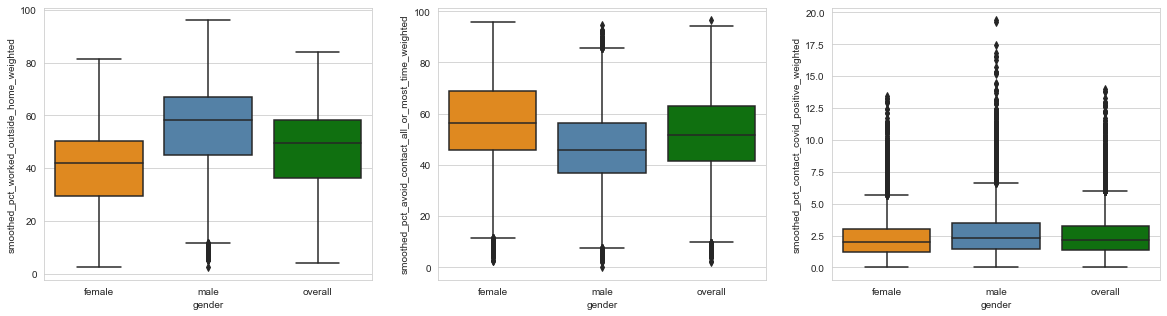

In [29]:
f, axes = plt.subplots(1,3, figsize=(20,5))
sns.set_palette(gender_palette_usa)
sns.boxplot(data=US_state_till_15_09, x="gender", y="smoothed_pct_worked_outside_home_weighted", ax=axes[0])
sns.boxplot(data=US_state_till_15_09, x="gender", y="smoothed_pct_avoid_contact_all_or_most_time_weighted", ax=axes[1])
sns.boxplot(data=US_state, x="gender", y="smoothed_pct_contact_covid_positive_weighted", ax=axes[2])

* A higher percentage in men worked outside of their home
* More demales avoided contacts at all or most times
* More men has contact with COVID positive people

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_contact_covid_positive_weighted'>

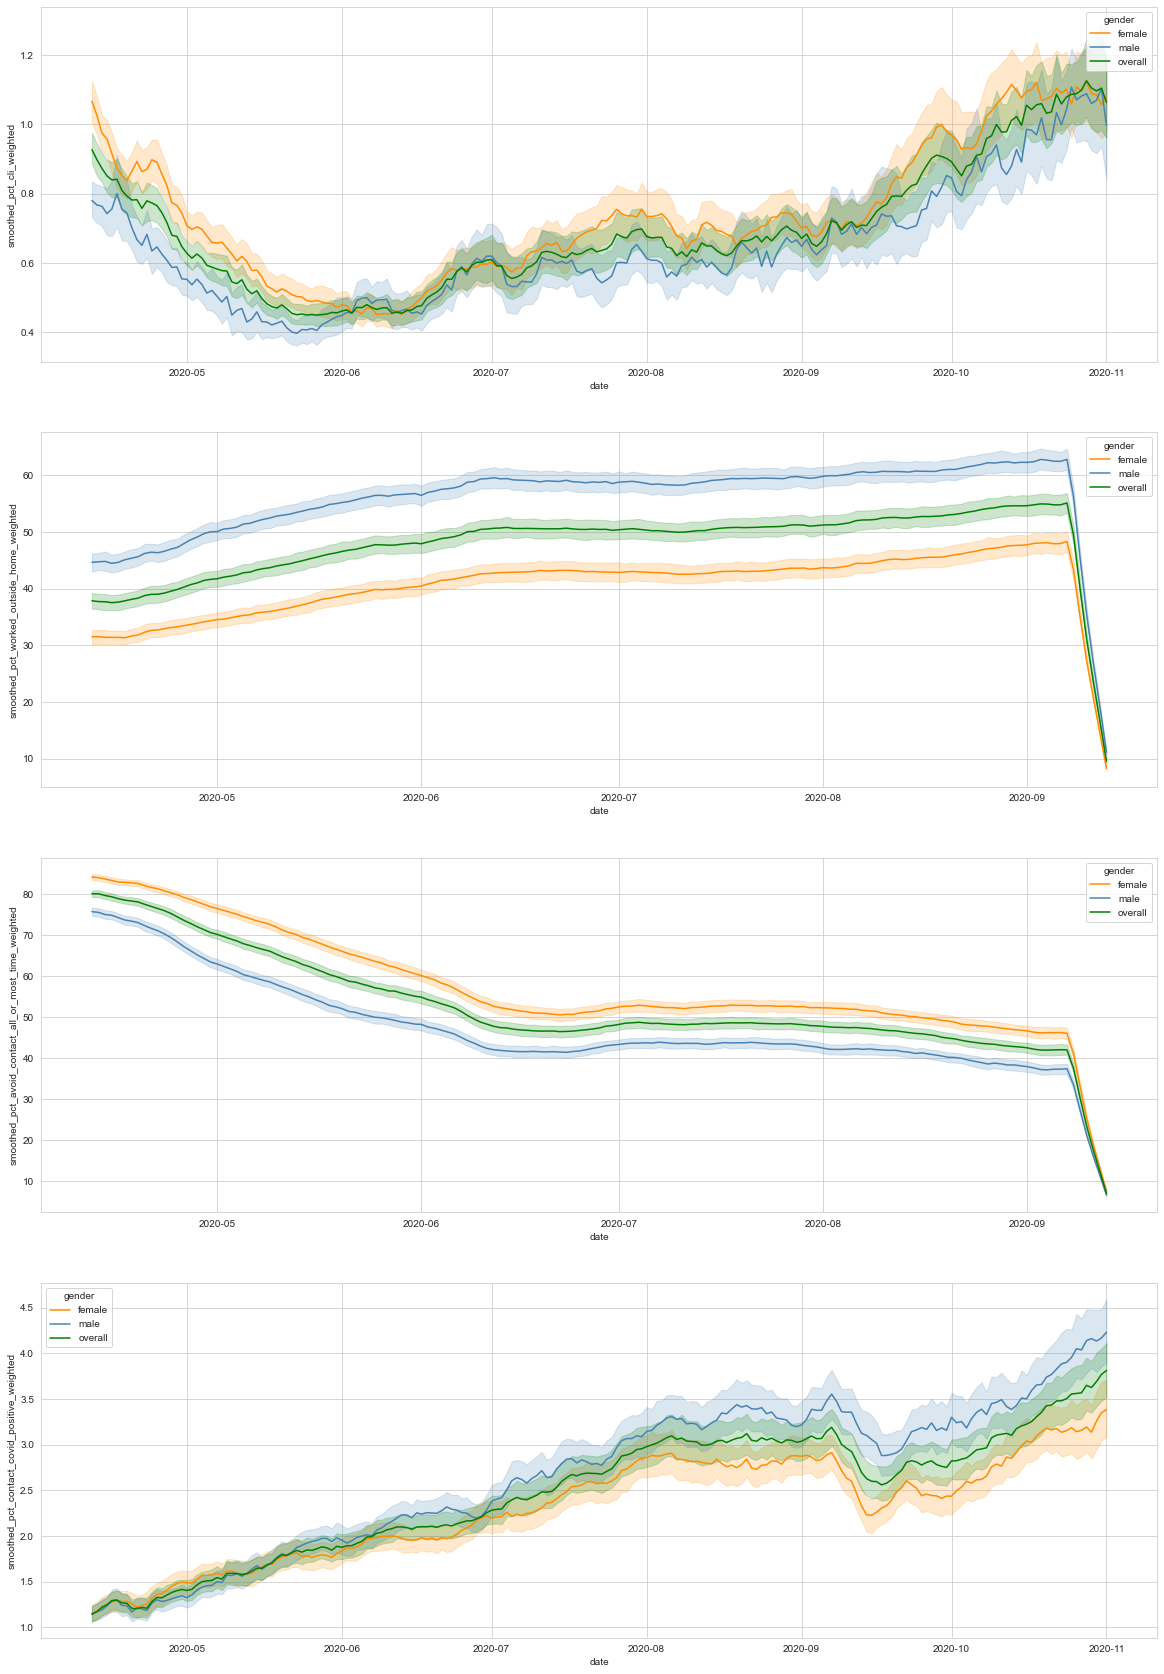

In [30]:
f, axes = plt.subplots(4,1, figsize=(20,30))
sns.set_palette(gender_palette_usa)
sns.lineplot(data=US_state, x="date", y="smoothed_pct_cli_weighted", hue="gender", ax=axes[0])
sns.lineplot(data=US_state_till_15_09, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="gender", ax=axes[1])
sns.lineplot(data=US_state_till_15_09, x="date", y="smoothed_pct_avoid_contact_all_or_most_time_weighted", hue="gender", ax=axes[2])
sns.lineplot(data=US_state, x="date", y="smoothed_pct_contact_covid_positive_weighted", hue="gender", ax=axes[3])


As seen by the boxplots as well as the timeseries graphs, more men worked outside of their home at any given time, while more women avoided contacts at all or most times. Between the 12th of April and the 13th of September the number of people working outside of their own home increased by over 10%, while the number of people avoiding all or most contacts decreased by nearly 40%.  
The percentage of people who reported COVID-like illness decreased till June and then gradually increased again for the next 5 months. The number of people who reported contact with a COVID positive person increased steadily, with a small dip in September. 

## Age

<AxesSubplot:xlabel='age_bucket', ylabel='smoothed_pct_contact_covid_positive_weighted'>

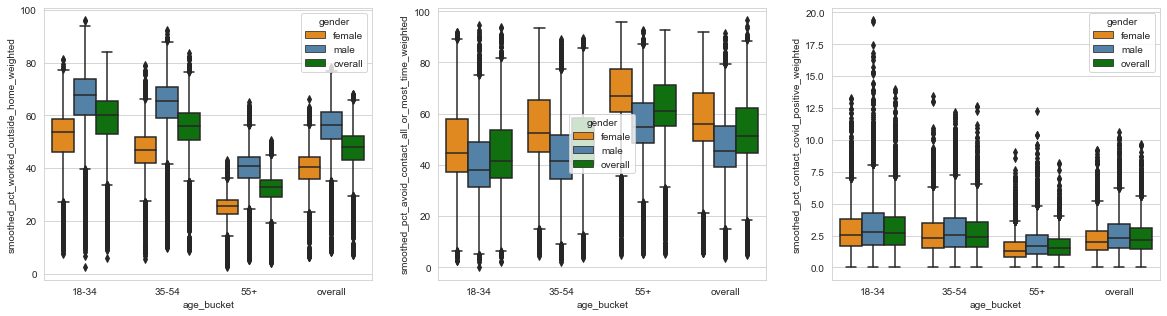

In [31]:
f, axes = plt.subplots(1,3, figsize=(20,5))
sns.set_palette(gender_palette_usa)
sns.boxplot(data=US_state_till_15_09, x="age_bucket", y="smoothed_pct_worked_outside_home_weighted", hue="gender", ax=axes[0])
sns.boxplot(data=US_state_till_15_09, x="age_bucket", y="smoothed_pct_avoid_contact_all_or_most_time_weighted", hue="gender", ax=axes[1])
sns.boxplot(data=US_state, x="age_bucket", y="smoothed_pct_contact_covid_positive_weighted", hue="gender", ax=axes[2])

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_contact_covid_positive_weighted'>

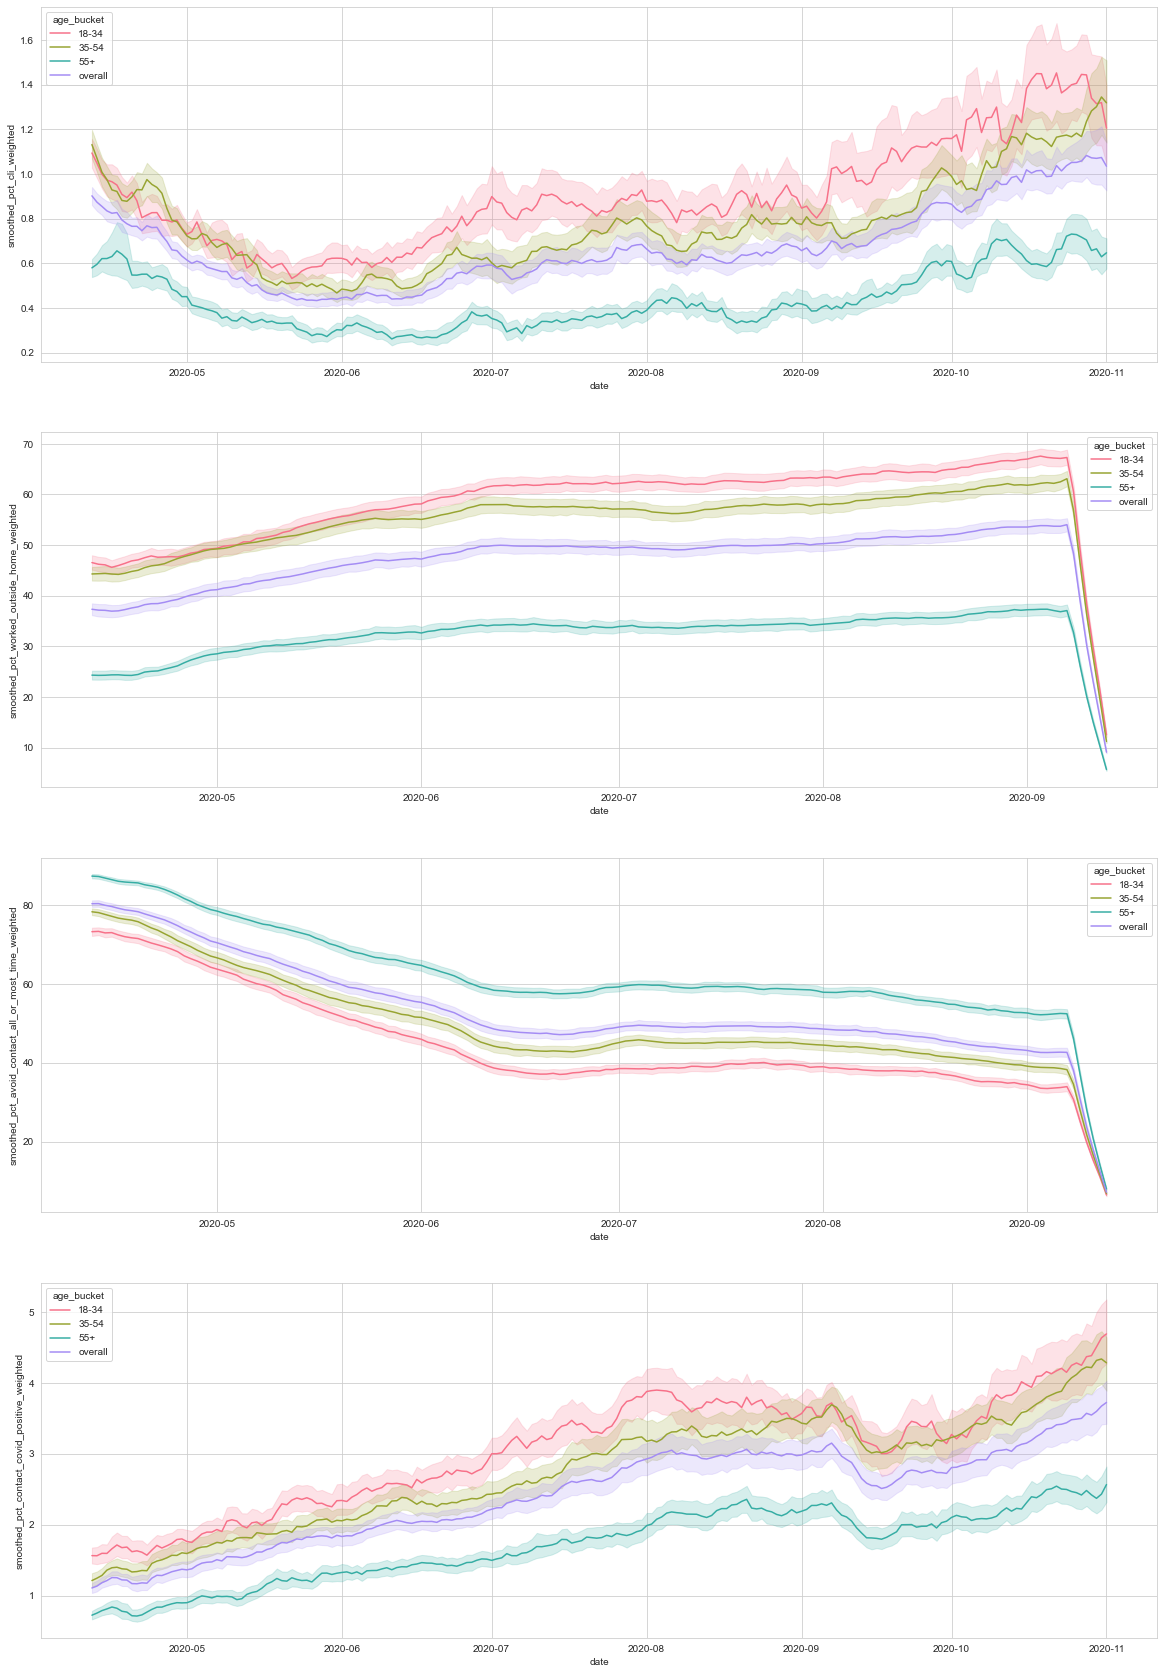

In [32]:
f, axes = plt.subplots(4,1, figsize=(20,30))

sns.lineplot(data=US_state, x="date", y="smoothed_pct_cli_weighted", hue="age_bucket", ax=axes[0])
sns.lineplot(data=US_state_till_15_09, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="age_bucket", ax=axes[1])
sns.lineplot(data=US_state_till_15_09, x="date", y="smoothed_pct_avoid_contact_all_or_most_time_weighted", hue="age_bucket", ax=axes[2])
sns.lineplot(data=US_state, x="date", y="smoothed_pct_contact_covid_positive_weighted", hue="age_bucket", ax=axes[3])

The trends seen in the US dataset are in line, with what we observed in the global dataset. People aged 55+ were least likely to work outside of their own home, as this age bucket also includes the already retired population. This age bucket also avoids contacts the most, which could be explained by them being most at risk of a serious COVID illness. 

# Effect of Human Development Index on Social Distancing

In [33]:
# Getting the dictionaries for the hdi and the hdi-levels.
dict_hdi_index, dict_hdi_levels = functions.get_hdi("data","hdro_statistical_data_tables_1_15_d1_d5.xlsx")

# Creating a new column with the hdi and the hdi-levels in the regions dataframe
regions_no_other = functions.create_hdi_columns(regions_no_other, dict_hdi_index, dict_hdi_levels)

Creating dictionaries for hdi and hdi-levels completed.
Creating hdi list completed.
Creating hdi-level list completed.


In [34]:
regions_no_other.hdi_level.unique()

array(['low', 'high', 'NaN', 'medium', 'very high'], dtype=object)

In [35]:
regions_no_other[regions_no_other["hdi_level"]== "NaN"].country_agg.unique()

array(['American Samoa'], dtype=object)

In [37]:
hdi = get_group.group_hdi(regions_no_other)
hdi_low = hdi[0]
hdi_medium = hdi[1]
hdi_high = hdi[2]
hdi_very_high = hdi[3]

In [55]:
hdi_order = ["low", "medium", "high", "very high"]

<AxesSubplot:xlabel='hdi_level', ylabel='smoothed_pct_no_public_weighted'>

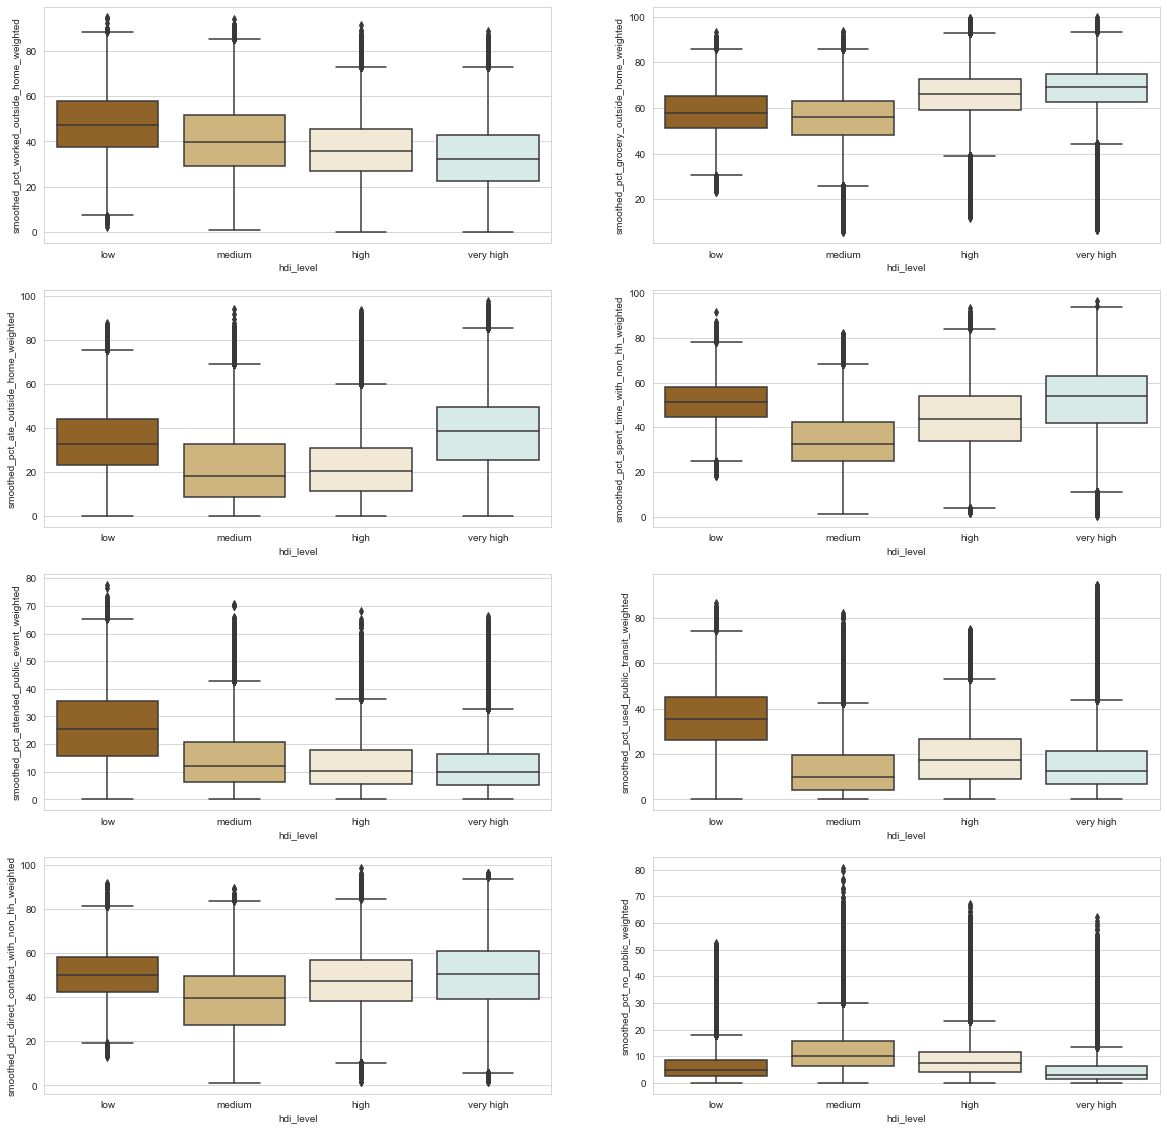

In [54]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.set_palette("BrBG")

sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_worked_outside_home_weighted", order=hdi_order, ax=axes[0][0])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_grocery_outside_home_weighted", order=hdi_order, ax=axes[0][1])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_ate_outside_home_weighted", order=hdi_order, ax=axes[1][0])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_spent_time_with_non_hh_weighted", order=hdi_order, ax=axes[1][1])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_attended_public_event_weighted", order=hdi_order, ax=axes[2][0])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_used_public_transit_weighted", order=hdi_order, ax=axes[2][1])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_direct_contact_with_non_hh_weighted", order=hdi_order, ax=axes[3][0])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_no_public_weighted", order=hdi_order, ax=axes[3][1])

<AxesSubplot:xlabel='hdi_level', ylabel='smoothed_pct_no_public_weighted'>

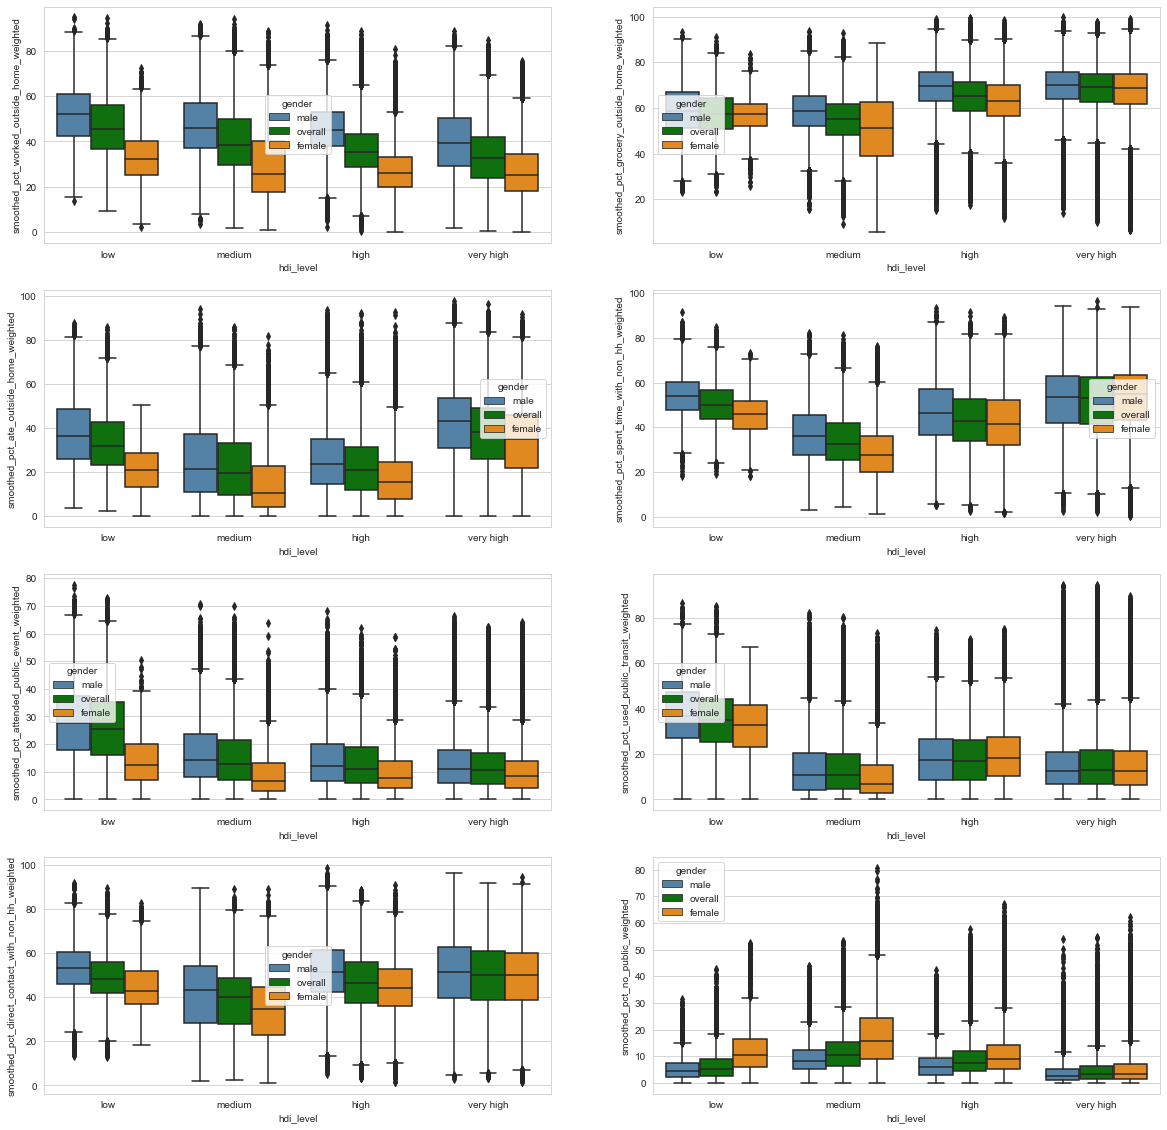

In [57]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.set_palette(gender_palette_global)

sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_worked_outside_home_weighted", order=hdi_order, hue="gender", ax=axes[0][0])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_grocery_outside_home_weighted", order=hdi_order, hue="gender", ax=axes[0][1])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_ate_outside_home_weighted", order=hdi_order, hue="gender", ax=axes[1][0])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_spent_time_with_non_hh_weighted", order=hdi_order, hue="gender", ax=axes[1][1])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_attended_public_event_weighted", order=hdi_order, hue="gender", ax=axes[2][0])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_used_public_transit_weighted", order=hdi_order, hue="gender", ax=axes[2][1])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_direct_contact_with_non_hh_weighted", order=hdi_order, hue="gender", ax=axes[3][0])
sns.boxplot(data=regions_no_other, x="hdi_level", y="smoothed_pct_no_public_weighted", order=hdi_order, hue="gender", ax=axes[3][1])

# Other stuff not tidy in any way and without explanations/annotations

In [ ]:
f, axes = plt.subplots(4,2, figsize=(15,20))

sns.scatterplot(data=countries, x="smoothed_pct_cli_weighted", y="smoothed_pct_worked_outside_home_weighted", hue="age_bucket", ax=axes[0][0])
sns.scatterplot(data=countries, x="smoothed_pct_cli_weighted", y="smoothed_pct_grocery_outside_home_weighted", hue="age_bucket", ax=axes[0][1])
sns.scatterplot(data=countries, x="smoothed_pct_cli_weighted", y="smoothed_pct_ate_outside_home_weighted", hue="age_bucket", ax=axes[1][0])
sns.scatterplot(data=countries, x="smoothed_pct_cli_weighted", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="age_bucket", ax=axes[1][1])
sns.scatterplot(data=countries, x="smoothed_pct_cli_weighted", y="smoothed_pct_attended_public_event_weighted", hue="age_bucket", ax=axes[2][0])
sns.scatterplot(data=countries, x="smoothed_pct_cli_weighted", y="smoothed_pct_used_public_transit_weighted", hue="age_bucket", ax=axes[2][1])
sns.scatterplot(data=countries, x="smoothed_pct_cli_weighted", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="age_bucket", ax=axes[3][0])
sns.scatterplot(data=countries, x="smoothed_pct_cli_weighted", y="smoothed_pct_no_public_weighted", hue="age_bucket", ax=axes[3][1])

# Asia

### Grouping of Asia according to the UN: 

https://pitt.libguides.com/c.php?g=12555&p=66443

#### Western Asia (w)
Armenia, Azerbaijan, Israel, Jordan, Kuwait, Lebanon, Oman, Iraq, Qatar, Saudi Arabia, United Arab Emirates, Yemen

#### Central Asia (c)
Kazakhstan, Kyrgyzstan, Uzbekistan

#### Southern Asia (s)
Bangladesh, India, Nepal, Afghanistan, Pakistan, Sri Lanka

#### Eastern Asia (e)
Hong Kong, Japan, South Korea, Taiwan

#### South Eastern Asia (se)
Cambodia, Indonesia, Laos, Malaysia, Myanmar, Singapore, Thailand, Vietnam

In [ ]:
asia_w_names = ['Armenia', 'Azerbaijan', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Iraq', 'Qatar', 'Saudi Arabia', 
                'United Arab Emirates', 'Yemen']
asia_c_names = ['Kazakhstan', 'Kyrgyzstan', 'Uzbekistan']
asia_s_names = ['Bangladesh','India', 'Nepal', 'Afghanistan', 'Pakistan', 'Sri Lanka']
asia_e_names = ['Hong Kong', 'Japan', 'South Korea', 'Taiwan']
asia_se_names = ['Cambodia','Indonesia', 'Laos','Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'Vietnam']


#df.loc[df['column_name'].isin(some_values)]
asia_w = countries.loc[countries["country_agg"].isin(asia_w_names)]
asia_c = countries.loc[countries["country_agg"].isin(asia_c_names)]
asia_s = countries.loc[countries["country_agg"].isin(asia_s_names)]
asia_e = countries.loc[countries["country_agg"].isin(asia_e_names)]
asia_se = countries.loc[countries["country_agg"].isin(asia_se_names)]

In [ ]:
f, axes = plt.subplots(5,1, figsize=(20,50))

sns.lineplot(data=asia_w, x="date", y="smoothed_pct_cli_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=asia_c, x="date", y="smoothed_pct_cli_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=asia_s, x="date", y="smoothed_pct_cli_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=asia_e, x="date", y="smoothed_pct_cli_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=asia_se, x="date", y="smoothed_pct_cli_weighted", hue="country_agg", ax=axes[4])

#### Western Asia (w)
Armenia, Azerbaijan, Israel, Jordan, Kuwait, Lebanon, Oman, Iraq, Qatar, Saudi Arabia, United Arab Emirates, Yemen

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=asia_w, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=asia_w, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=asia_w, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=asia_w, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=asia_w, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=asia_w, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=asia_w, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=asia_w, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])

#### Central Asia (c)
Kazakhstan, Kyrgyzstan, Uzbekistan

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=asia_c, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=asia_c, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=asia_c, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=asia_c, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=asia_c, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=asia_c, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=asia_c, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=asia_c, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])

#### Southern Asia (s)
Bangladesh, India, Nepal, Afghanistan, Pakistan, Sri Lanka

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=asia_s, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=asia_s, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=asia_s, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=asia_s, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=asia_s, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=asia_s, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=asia_s, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=asia_s, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])

#### Eastern Asia (e)
Hong Kong, Japan, South Korea, Taiwan

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=asia_e, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=asia_e, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=asia_e, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=asia_e, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=asia_e, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=asia_e, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=asia_e, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=asia_e, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])

#### South Eastern Asia (se)
Cambodia, Indonesia, Laos, Malaysia, Myanmar, Singapore, Thailand, Vietnam

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=asia_se, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=asia_se, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=asia_se, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=asia_se, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=asia_se, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=asia_se, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=asia_se, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=asia_se, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])

# Oceania

In [ ]:
oceania_names = ["New Zealand", "Australia"]
oceania = countries.loc[countries["country_agg"].isin(oceania_names)]

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=oceania, x="date", y="smoothed_pct_cli_weighted", hue="country_agg")

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=oceania, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=oceania, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=oceania, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=oceania, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=oceania, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=oceania, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=oceania, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=oceania, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])

## Americas 

#### North America (n)
Canada (USA is in seperate dataset)

#### Central America (ce)
Costa Rica, El Salvador, Guatemala,  Honduras, Mexico, Nicaragua, Panama

#### Carribean (c)
Dominican Republic, Haiti

#### South America (s)
Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Paraguay, Peru, Uruguay, Venezuela

In [ ]:
america_n_names = ["Canada"]
america_ce_names = ["Costa Rica", "El Salvador", "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama"]
america_c_names = ["Dominican Republic", "Haiti"]
america_s_names = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Paraguay", "Peru", 
                   "Uruguay", "Venezuela"]

In [ ]:
america_n = countries.loc[countries["country_agg"].isin(america_n_names)]
america_ce = countries.loc[countries["country_agg"].isin(america_ce_names)]
america_c = countries.loc[countries["country_agg"].isin(america_c_names)]
america_s = countries.loc[countries["country_agg"].isin(america_s_names)]

In [ ]:
f, axes = plt.subplots(4,1, figsize=(20,50))

sns.lineplot(data=america_n, x="date", y="smoothed_pct_cli_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=america_ce, x="date", y="smoothed_pct_cli_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=america_c, x="date", y="smoothed_pct_cli_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=america_s, x="date", y="smoothed_pct_cli_weighted", hue="country_agg", ax=axes[3])

#### North America (n)
Canada (USA is in seperate dataset)

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=america_n, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=america_n, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=america_n, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=america_n, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=america_n, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=america_n, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=america_n, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=america_n, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])

#### Central America (ce)
Costa Rica, El Salvador, Guatemala,  Honduras, Mexico, Nicaragua, Panama

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=america_ce, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=america_ce, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=america_ce, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=america_ce, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=america_ce, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=america_ce, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=america_ce, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=america_ce, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])

#### Carribean (c)
Dominican Republic, Haiti

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=america_c, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=america_c, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=america_c, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=america_c, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=america_c, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=america_c, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=america_c, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=america_c, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])

#### South America (s)
Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Paraguay, Peru, Uruguay, Venezuela

In [ ]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=america_s, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="country_agg", ax=axes[0])
sns.lineplot(data=america_s, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="country_agg", ax=axes[1])
sns.lineplot(data=america_s, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="country_agg", ax=axes[2])
sns.lineplot(data=america_s, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="country_agg", ax=axes[3])
sns.lineplot(data=america_s, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[4])
sns.lineplot(data=america_s, x="date", y="smoothed_pct_used_public_transit_weighted", hue="country_agg", ax=axes[5])
sns.lineplot(data=america_s, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="country_agg", ax=axes[6])
sns.lineplot(data=america_s, x="date", y="smoothed_pct_no_public_weighted", hue="country_agg", ax=axes[7])